<a href="https://colab.research.google.com/github/Atharva1309/Bitcoin_Price_Prediction/blob/main/Bitcoin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import pandas_datareader as web
import warnings
!pip install fbprophet
import fbprophet

In [2]:
# Load the data
# The following command is used to load data on Google Colab
from google.colab import files
uploaded = files.upload()

Saving bitcoin data.xlsx to bitcoin data.xlsx


In [4]:
# Store the data in a variable
df = pd.read_excel('bitcoin data.xlsx')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-19,8941.445313,9164.362305,8620.080078,8706.245117,8706.245117,34217320471
1,2020-01-20,8704.631836,8745.590820,8560.473633,8657.642578,8657.642578,26422375678
2,2020-01-21,8658.991211,8755.706055,8544.520508,8745.894531,8745.894531,24097418512
3,2020-01-22,8744.210938,8792.994141,8636.747070,8680.875977,8680.875977,22600204050
4,2020-01-23,8680.650391,8687.747070,8333.637695,8406.515625,8406.515625,25770680778
5,2020-01-24,8405.567383,8514.666992,8266.840820,8445.434570,8445.434570,24397913025
6,2020-01-25,8440.119141,8458.453125,8296.218750,8367.847656,8367.847656,19647331548
7,2020-01-26,8364.410156,8602.401367,8325.498047,8596.830078,8596.830078,22177678795
8,2020-01-27,8597.308594,8977.726563,8597.308594,8909.819336,8909.819336,28647338393
9,2020-01-28,8912.524414,9358.589844,8908.447266,9358.589844,9358.589844,34398744402


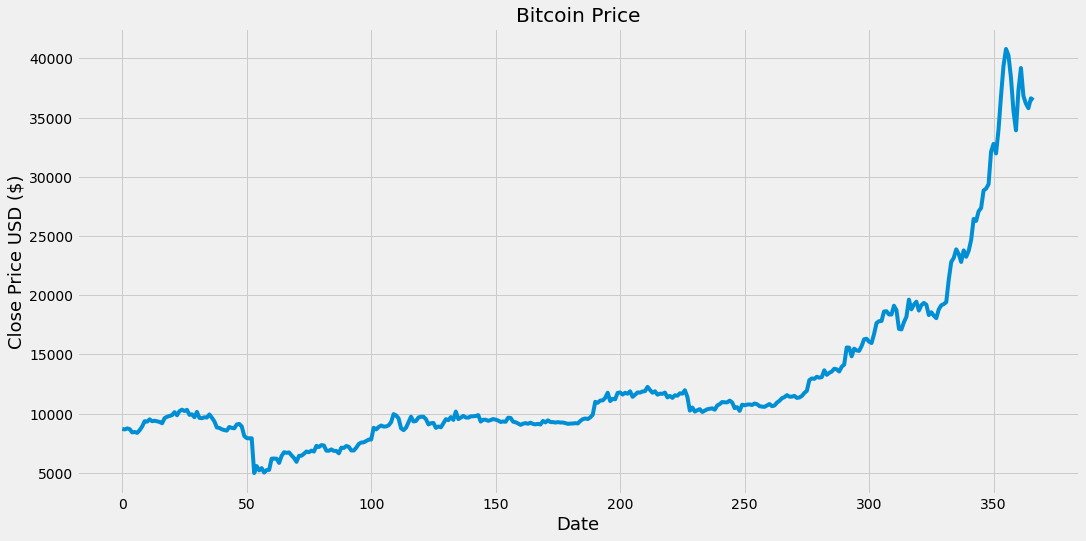

In [5]:
# Visualizing the closing price of Bitcoin
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Bitcoin Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [9]:
# Extracting two features to fit our model
df = df[["Date","Close"]] 
df = df.rename(columns = {"Date":"ds","Close":"y"})
df.head()

,ds,y
0,2020-01-19,8706.245117
1,2020-01-20,8657.642578
2,2020-01-21,8745.894531
3,2020-01-22,8680.875977
4,2020-01-23,8406.515625


In [10]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


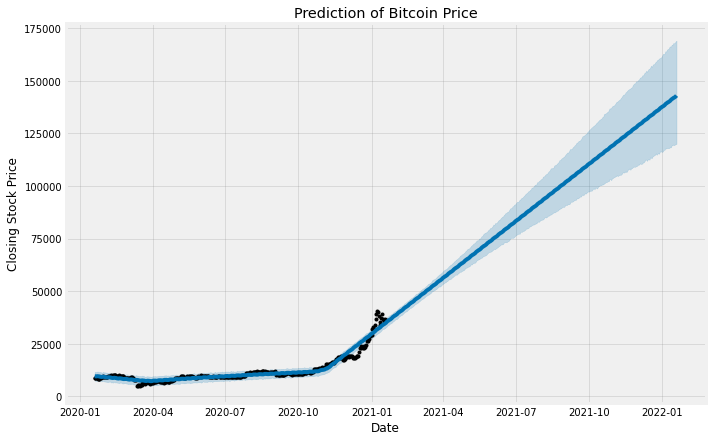

In [11]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)
plt.title("Prediction of Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

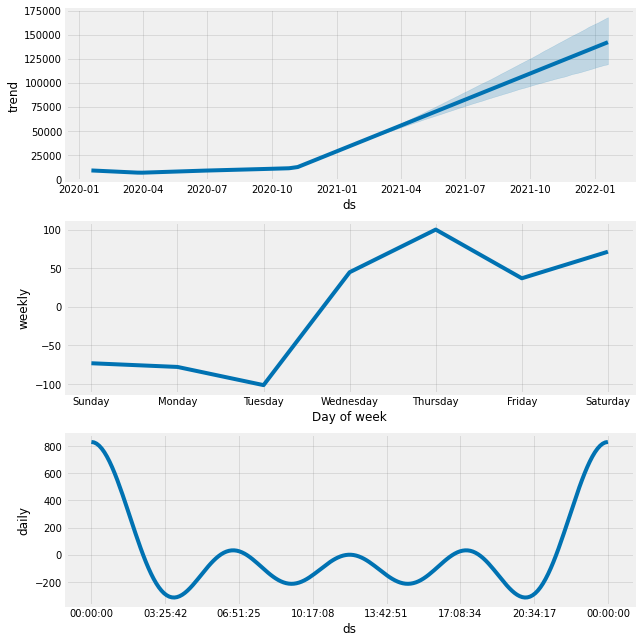

In [12]:
m.plot_components(forecast)
plt.show()